In [ ]:
 !pip install torch torchtext transformers sentencepiece pandas tqdm datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 7.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
pip install --upgrade torch torchvision torchaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 95.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 92.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 MB 6.8 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 2.2.0
    Uninstalling triton-2.2.0:
      Successfully uninstalled triton-2.2.0
  Attempting uninstall: nvidia-nccl-cu12
    Found existing installation: nvidia-nccl-cu12 2.19.3
    Uninstalling nvidia-nccl-cu12-2.19.3:
      Successfully uninstalled nvidia-nccl-cu12-2.19.3
  Attempting uninstall: torch
    Found existing installation: torch 2.2.1+cu121
    Uninstalling torch-2.2.1+cu121:
      Successfully uninstalled torch-2.2.1+cu121
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.

In [ ]:
pip install torch torchvision torchaudio -f https://download.pytorch.org/whl/cu118

Looking in links: https://download.pytorch.org/whl/cu118


In [ ]:
import torch
print(torch.cuda.is_available())

True


In [ ]:
from datasets import load_dataset, DatasetDict, Dataset
import pandas as pd
import ast
import datasets
from tqdm import tqdm
import time

In [ ]:
data_sample = load_dataset("QuyenAnhDE/Diseases_Symptoms")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Repo card metadata block was not found. Setting CardData to empty.


Generating train split:   0%|          | 0/400 [00:00<?, ? examples/s]

In [ ]:
data_sample

DatasetDict({
    train: Dataset({
        features: ['Code', 'Name', 'Symptoms', 'Treatments'],
        num_rows: 400
    })
})

In [ ]:
updated_data = [{'Name': item['Name'], 'Symptoms': item['Symptoms']} for item in data_sample['train']]
df = pd.DataFrame(updated_data)

df.head(5)

,Name,Symptoms
0,Panic disorder,"Palpitations, Sweating, Trembling, Shortness o..."
1,Vocal cord polyp,"Hoarseness, Vocal Changes, Vocal Fatigue"
2,Turner syndrome,"Short stature, Gonadal dysgenesis, Webbed neck..."
3,Cryptorchidism,"Absence or undescended testicle(s), empty scro..."
4,Ethylene glycol poisoning-1,"Nausea, vomiting, abdominal pain, General mala..."


In [ ]:
df['Symptoms'] = df['Symptoms'].apply(lambda x: ', '.join(x.split(', ')))
display(df.head())

,Name,Symptoms
0,Panic disorder,"Palpitations, Sweating, Trembling, Shortness o..."
1,Vocal cord polyp,"Hoarseness, Vocal Changes, Vocal Fatigue"
2,Turner syndrome,"Short stature, Gonadal dysgenesis, Webbed neck..."
3,Cryptorchidism,"Absence or undescended testicle(s), empty scro..."
4,Ethylene glycol poisoning-1,"Nausea, vomiting, abdominal pain, General mala..."


In [ ]:
pip install -U huggingface_hub

In [ ]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split

In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    # If Apple Silicon, set to 'mps' - otherwise 'cpu' (not advised)
    try:
        device = torch.device('mps')
    except Exception:
        device = torch.device('cpu')

device


device(type='cuda')

In [ ]:
tokenizer = GPT2Tokenizer.from_pretrained('distilgpt2')

# The transformer
model = GPT2LMHeadModel.from_pretrained('distilgpt2').to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [ ]:
model

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-5): 6 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [ ]:
BATCH_SIZE = 8

In [ ]:
df.describe()

,Name,Symptoms
count,400,400
unique,392,395
top,Sciatica,"Swelling, pain, dry mouth, bad taste"
freq,3,3


In [ ]:
class LanguageDataset(Dataset):
    """
    An extension of the Dataset object to:
      - Make training loop cleaner
      - Make ingestion easier from pandas df's
    """
    def __init__(self, df, tokenizer):
        self.labels = df.columns
        self.data = df.to_dict(orient='records')
        self.tokenizer = tokenizer
        x = self.fittest_max_length(df)  # Fix here
        self.max_length = x

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x = self.data[idx][self.labels[0]]
        y = self.data[idx][self.labels[1]]
        text = f"{x} | {y}"
        tokens = self.tokenizer.encode_plus(text, return_tensors='pt', max_length=128, padding='max_length', truncation=True)
        return tokens

    def fittest_max_length(self, df):  # Fix here
        """
        Smallest power of two larger than the longest term in the data set.
        Important to set up max length to speed training time.
        """
        max_length = max(len(max(df[self.labels[0]], key=len)), len(max(df[self.labels[1]], key=len)))
        x = 2
        while x < max_length: x = x * 2
        return x

# Cast the Huggingface data set as a LanguageDataset we defined above
data_sample = LanguageDataset(df, tokenizer)

In [ ]:
data_sample

In [ ]:
train_size = int(0.8 * len(data_sample))
valid_size = len(data_sample) - train_size
train_data, valid_data = random_split(data_sample, [train_size, valid_size])

In [ ]:
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=BATCH_SIZE)

In [ ]:
num_epochs = 10

In [ ]:
batch_size = BATCH_SIZE
model_name = 'distilgpt2'
gpu = 0

In [ ]:
criterion = nn.CrossEntropyLoss(ignore_index = tokenizer.pad_token_id)
optimizer = optim.Adam(model.parameters(), lr=5e-4)
tokenizer.pad_token = tokenizer.eos_token

In [ ]:
results = pd.DataFrame(columns=['epoch', 'transformer', 'batch_size', 'gpu',
                                'training_loss', 'validation_loss', 'epoch_duration_sec'])

In [ ]:
for epoch in range(num_epochs):
    start_time = time.time()  # Start the timer for the epoch

    # Training
    ## This line tells the model we're in 'learning mode'
    model.train()
    epoch_training_loss = 0
    train_iterator = tqdm(train_loader, desc=f"Training Epoch {epoch+1}/{num_epochs} Batch Size: {batch_size}, Transformer: {model_name}")
    for batch in train_iterator:
        optimizer.zero_grad()
        inputs = batch['input_ids'].squeeze(1).to(device)
        targets = inputs.clone()
        outputs = model(input_ids=inputs, labels=targets)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        train_iterator.set_postfix({'Training Loss': loss.item()})
        epoch_training_loss += loss.item()
    avg_epoch_training_loss = epoch_training_loss / len(train_iterator)

    # Validation
    ## This line below tells the model to 'stop learning'
    model.eval()
    epoch_validation_loss = 0
    total_loss = 0
    valid_iterator = tqdm(valid_loader, desc=f"Validation Epoch {epoch+1}/{num_epochs}")
    with torch.no_grad():
        for batch in valid_iterator:
            inputs = batch['input_ids'].squeeze(1).to(device)
            targets = inputs.clone()
            outputs = model(input_ids=inputs, labels=targets)
            loss = outputs.loss
            total_loss += loss
            valid_iterator.set_postfix({'Validation Loss': loss.item()})
            epoch_validation_loss += loss.item()

    avg_epoch_validation_loss = epoch_validation_loss / len(valid_loader)

    end_time = time.time()  # End the timer for the epoch
    epoch_duration_sec = end_time - start_time  # Calculate the duration in seconds

    new_row = {'transformer': model_name,
               'batch_size': batch_size,
               'gpu': gpu,
               'epoch': epoch+1,
               'training_loss': avg_epoch_training_loss,
               'validation_loss': avg_epoch_validation_loss,
               'epoch_duration_sec': epoch_duration_sec}  # Add epoch_duration to the dataframe

    results.loc[len(results)] = new_row
    print(f"Epoch: {epoch+1}, Validation Loss: {total_loss/len(valid_loader)}")

Training Epoch 1/10 Batch Size: 8, Transformer: distilgpt2: 100%|██████████| 40/40 [00:09<00:00,  4.43it/s, Training Loss=0.684]
Validation Epoch 1/10: 100%|██████████| 10/10 [00:00<00:00, 18.60it/s, Validation Loss=0.652]


Epoch: 1, Validation Loss: 0.6515601277351379


Training Epoch 2/10 Batch Size: 8, Transformer: distilgpt2: 100%|██████████| 40/40 [00:07<00:00,  5.58it/s, Training Loss=0.486]
Validation Epoch 2/10: 100%|██████████| 10/10 [00:00<00:00, 18.76it/s, Validation Loss=0.63]


Epoch: 2, Validation Loss: 0.6244149208068848


Training Epoch 3/10 Batch Size: 8, Transformer: distilgpt2: 100%|██████████| 40/40 [00:07<00:00,  5.36it/s, Training Loss=0.386]
Validation Epoch 3/10: 100%|██████████| 10/10 [00:00<00:00, 18.72it/s, Validation Loss=0.632]


Epoch: 3, Validation Loss: 0.6448704600334167


Training Epoch 4/10 Batch Size: 8, Transformer: distilgpt2: 100%|██████████| 40/40 [00:07<00:00,  5.48it/s, Training Loss=0.328]
Validation Epoch 4/10: 100%|██████████| 10/10 [00:00<00:00, 18.43it/s, Validation Loss=0.691]


Epoch: 4, Validation Loss: 0.7060942053794861


Training Epoch 5/10 Batch Size: 8, Transformer: distilgpt2: 100%|██████████| 40/40 [00:07<00:00,  5.45it/s, Training Loss=0.163]
Validation Epoch 5/10: 100%|██████████| 10/10 [00:00<00:00, 17.75it/s, Validation Loss=0.737]


Epoch: 5, Validation Loss: 0.7261525988578796


Training Epoch 6/10 Batch Size: 8, Transformer: distilgpt2: 100%|██████████| 40/40 [00:07<00:00,  5.41it/s, Training Loss=0.266]
Validation Epoch 6/10: 100%|██████████| 10/10 [00:00<00:00, 18.11it/s, Validation Loss=0.759]


Epoch: 6, Validation Loss: 0.7740043997764587


Training Epoch 7/10 Batch Size: 8, Transformer: distilgpt2: 100%|██████████| 40/40 [00:07<00:00,  5.32it/s, Training Loss=0.199]
Validation Epoch 7/10: 100%|██████████| 10/10 [00:00<00:00, 18.20it/s, Validation Loss=0.809]


Epoch: 7, Validation Loss: 0.8053105473518372


Training Epoch 8/10 Batch Size: 8, Transformer: distilgpt2: 100%|██████████| 40/40 [00:07<00:00,  5.35it/s, Training Loss=0.103]
Validation Epoch 8/10: 100%|██████████| 10/10 [00:00<00:00, 17.97it/s, Validation Loss=0.841]


Epoch: 8, Validation Loss: 0.8350936770439148


Training Epoch 9/10 Batch Size: 8, Transformer: distilgpt2: 100%|██████████| 40/40 [00:07<00:00,  5.37it/s, Training Loss=0.204]
Validation Epoch 9/10: 100%|██████████| 10/10 [00:00<00:00, 18.29it/s, Validation Loss=0.884]


Epoch: 9, Validation Loss: 0.8965045809745789


Training Epoch 10/10 Batch Size: 8, Transformer: distilgpt2: 100%|██████████| 40/40 [00:07<00:00,  5.37it/s, Training Loss=0.108]
Validation Epoch 10/10: 100%|██████████| 10/10 [00:00<00:00, 18.24it/s, Validation Loss=0.941]

Epoch: 10, Validation Loss: 0.9517312049865723


In [ ]:
input_str = "Kidney Failure"
input_ids = tokenizer.encode(input_str, return_tensors='pt').to(device)

output = model.generate(
    input_ids,
    max_length=20,
    num_return_sequences=1,
    do_sample=True,
    top_k=8,
    top_p=0.95,
    temperature=0.5,
    repetition_penalty=1.2
)

decoded_output = tokenizer.decode(output[0], skip_special_tokens=True)
print(decoded_output)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Kidney Failure | Decreased urine output, fluid retention, fatigue


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Epoch 1/10 Training Loss: 1.2860
Epoch 2/10 Training Loss: 0.5555
Epoch 3/10 Training Loss: 0.4260
Epoch 4/10 Training Loss: 0.3338
Epoch 5/10 Training Loss: 0.2637
Epoch 6/10 Training Loss: 0.2092
Epoch 7/10 Training Loss: 0.1708
Epoch 8/10 Training Loss: 0.1307
Epoch 9/10 Training Loss: 0.1160
Epoch 10/10 Training Loss: 0.0988
Epoch 1/10 Training Loss: 0.9814
Epoch 2/10 Training Loss: 0.4409
Epoch 3/10 Training Loss: 0.3340
Epoch 4/10 Training Loss: 0.2525
Epoch 5/10 Training Loss: 0.2040
Epoch 6/10 Training Loss: 0.1649
Epoch 7/10 Training Loss: 0.1264
Epoch 8/10 Training Loss: 0.1018
Epoch 9/10 Training Loss: 0.0891
Epoch 10/10 Training Loss: 0.0816


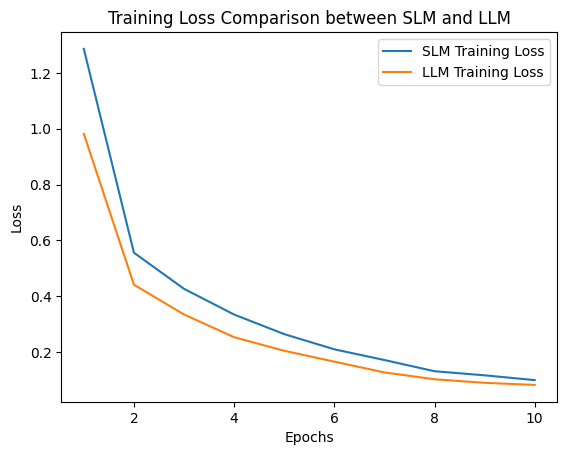

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'train_loader' and 'valid_loader' are already defined and loaded with the dataset
# Also assuming 'device' is set to 'cuda' if available, otherwise 'cpu'

# Initialize both the Small and Large Language Models
slm = GPT2LMHeadModel.from_pretrained('distilgpt2').to(device)
llm = GPT2LMHeadModel.from_pretrained('gpt2').to(device)  # Larger model

# Define the training function
def train_model(model, train_loader, valid_loader, optimizer, criterion, num_epochs=10):
    model.train()
    training_stats = []
    for epoch in range(num_epochs):
        start_time = time.time()
        epoch_training_loss = 0
        for batch in train_loader:
            optimizer.zero_grad()
            inputs = batch['input_ids'].squeeze(1).to(device)
            targets = inputs.clone()
            outputs = model(input_ids=inputs, labels=targets)
            loss = outputs.loss
            loss.backward()
            optimizer.step()
            epoch_training_loss += loss.item()
        avg_epoch_training_loss = epoch_training_loss / len(train_loader)
        training_stats.append(avg_epoch_training_loss)
        print(f"Epoch {epoch+1}/{num_epochs} Training Loss: {avg_epoch_training_loss:.4f}")
    return training_stats

# Train both models
optimizer_slm = optim.Adam(slm.parameters(), lr=5e-4)
optimizer_llm = optim.Adam(llm.parameters(), lr=5e-4)
criterion = nn.CrossEntropyLoss(ignore_index = tokenizer.pad_token_id)

training_stats_slm = train_model(slm, train_loader, valid_loader, optimizer_slm, criterion)
training_stats_llm = train_model(llm, train_loader, valid_loader, optimizer_llm, criterion)

# Plot the training loss comparison
epochs = np.arange(1, num_epochs+1)
plt.plot(epochs, training_stats_slm, label='SLM Training Loss')
plt.plot(epochs, training_stats_llm, label='LLM Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Comparison between SLM and LLM')
plt.legend()
plt.show()


In [ ]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import time

# Load the tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('distilgpt2')

# Load the models
slm = GPT2LMHeadModel.from_pretrained('distilgpt2')
llm = GPT2LMHeadModel.from_pretrained('gpt2')

# Move models to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
slm.to(device)
llm.to(device)

# Prepare the input text
input_text = "The symptoms of the flu are"
input_ids = tokenizer.encode(input_text, return_tensors='pt').to(device)

# Warm-up runs for fair comparison
with torch.no_grad():
    for _ in range(10):
        _ = slm(input_ids)
        _ = llm(input_ids)

# Measure inference time for SLM
start_time = time.time()
with torch.no_grad():
    slm_output = slm(input_ids)
slm_inference_time = time.time() - start_time

# Measure inference time for LLM
start_time = time.time()
with torch.no_grad():
    llm_output = llm(input_ids)
llm_inference_time = time.time() - start_time

print(f"SLM Inference Time: {slm_inference_time:.6f} seconds")
print(f"LLM Inference Time: {llm_inference_time:.6f} seconds")

# Compare the inference times
if slm_inference_time < llm_inference_time:
    print("SLM is faster than LLM for inference.")
else:
    print("LLM is faster than SLM for inference.")


SLM Inference Time: 0.008518 seconds
LLM Inference Time: 0.015379 seconds
SLM is faster than LLM for inference.


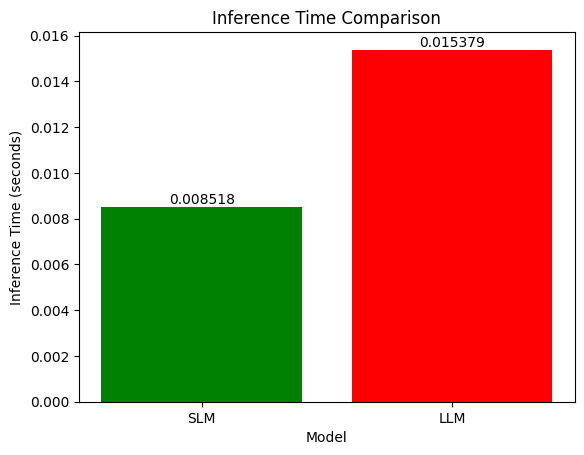

In [ ]:
import matplotlib.pyplot as plt

# Inference times from your measurements
slm_inference_time = slm_inference_time  # Replace with actual measurement
llm_inference_time = llm_inference_time  # Replace with actual measurement

# Labels for the bar chart
models = ['SLM', 'LLM']

# Corresponding inference time values
inference_times = [slm_inference_time, llm_inference_time]

# Creating the bar chart
plt.bar(models, inference_times, color=['green', 'red'])

# Adding the title and labels
plt.title('Inference Time Comparison')
plt.xlabel('Model')
plt.ylabel('Inference Time (seconds)')

# Displaying the values on the bars
for i, time in enumerate(inference_times):
    plt.text(i, time, f'{time:.6f}', ha = 'center', va = 'bottom')

# Show the plot
plt.show()

In [ ]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from torch.utils.data import DataLoader

# Load the tokenizer and models
tokenizer = GPT2Tokenizer.from_pretrained('distilgpt2')
slm = GPT2LMHeadModel.from_pretrained('distilgpt2')
llm = GPT2LMHeadModel.from_pretrained('gpt2')

# Move models to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
slm.to(device)
llm.to(device)

# Assuming 'valid_loader' is defined and loaded with the validation dataset
# Define the evaluation function
def evaluate_model(model, valid_loader):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for batch in valid_loader:
            inputs = batch['input_ids'].squeeze(1).to(device)
            targets = inputs.clone()
            outputs = model(input_ids=inputs, labels=targets)
            total_loss += outputs.loss.item()
    return total_loss / len(valid_loader)

# Evaluate both models
slm_loss = evaluate_model(slm, valid_loader)
llm_loss = evaluate_model(llm, valid_loader)

# Print the evaluation results
print(f"SLM Validation Loss: {slm_loss:.4f}")
print(f"LLM Validation Loss: {llm_loss:.4f}")

# Compare the losses
if slm_loss < llm_loss:
    print("SLM has higher accuracy (lower loss) on the validation set.")
else:
    print("LLM has higher accuracy (lower loss) on the validation set.")


SLM Validation Loss: 9.2942
LLM Validation Loss: 12.4217
SLM has higher accuracy (lower loss) on the validation set.


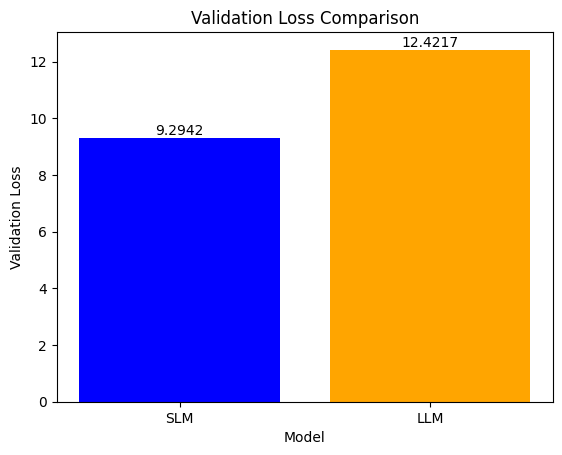

In [ ]:
import matplotlib.pyplot as plt

# Validation losses from your evaluation
slm_validation_loss = slm_loss
llm_validation_loss = llm_loss

# Labels for the bar chart
models = ['SLM', 'LLM']

# Corresponding validation loss values
losses = [slm_validation_loss, llm_validation_loss]

# Creating the bar chart
plt.bar(models, losses, color=['blue', 'orange'])

# Adding the title and labels
plt.title('Validation Loss Comparison')
plt.xlabel('Model')
plt.ylabel('Validation Loss')

# Displaying the values on the bars
for i, loss in enumerate(losses):
    plt.text(i, loss + 0.01, f'{loss:.4f}', ha = 'center', va = 'bottom')

# Show the plot
plt.show()